In [50]:
# импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
class MyKNeighbourClassifier:
    def __init__(self, n_neighbours: int = 5, metric: str = 'euclidean', weights: str = 'uniform'):
        
        # проверка на соответствие параметров
        if metric not in ['euclidean', 'manhattan']:
            raise ValueError(f'This type of metric is not supported: {metric}')
        if weights not in ['uniform', 'distance']:
            raise ValueError(f'This type of weights is not supported: {weights}')

        self.n_neighbours = n_neighbours
        self.metric = metric
        self.weights = weights

        self.X = None
        self.y = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.X = X
        self.y = y

    def predict(self, X: np.ndarray) -> np.ndarray:
        result = []
        for point in X:
            # вычислим расстояние между тестовой точкой и всеми остальными
            if self.metric == 'euclidean':
                distance = ((self.X - point) ** 2).sum(axis=1) ** 0.5
            elif self.metric == 'manhattan':
                distance = abs(self.X - point).sum(axis=1)

            # для каждого высчитанного расстояния добавим метку класса конкретной точки
            points_with_dist = np.hstack((distance.reshape(-1, 1), self.y.reshape(-1, 1)))

            # получим k-ближайших точек в отсортированном порядке
            k_nearest = sorted(points_with_dist, key=lambda x: x[0])[:self.n_neighbours]
            k_nearest = np.array(k_nearest)

            if self.n_neighbours == 1:
                result.append(k_nearest[0][1])
            else:
                if self.weights == 'uniform':
                    # выделяем и считаем метки для каждого класса среди k-ближайших точек
                    labels, count = np.unique(k_nearest[:, 1], return_counts=True)

                    # получаем индекс самой частовстречаемой метки класса
                    max_freq_ind = np.argmax(count)
                    result.append(labels[max_freq_ind])

                elif self.weights == 'distance':
                    dist_with_weight = []
                    # выделяем и считаем метки для каждого класса среди k-ближайших точек
                    labels, count = np.unique(k_nearest[:, 1], return_counts=True)

                    for label in labels:
                        weight = (1 / (k_nearest[k_nearest[:,1] == label][:, 1])).sum()
                        dist_with_weight.append([weight, label])
                    result.append(sorted(dist_with_weight, key=lambda x: -x[0])[0])


        return np.array(result)

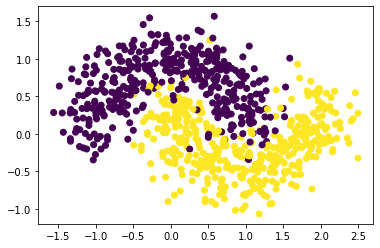

In [58]:
# генерирование выборки
X, y = make_moons(n_samples=800, noise=0.25)

plt.scatter(x=X[:,0], y=X[:,1], c=y);
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [59]:
clf = MyKNeighbourClassifier(n_neighbours=5, metric='euclidean', weights='uniform')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy score is 0.9416666666666667


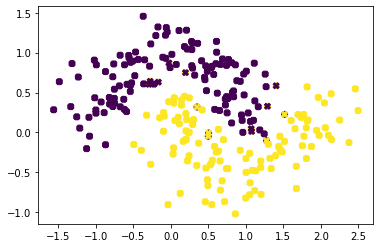

In [60]:
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=y_test)
#plt.show()
plt.scatter(x=X_test[:,0], y=X_test[:,1], c=y_pred, marker='X');


print(f'Accuracy score is {accuracy_score(y_test, y_pred)}')